<a href="https://colab.research.google.com/github/delaneybrown23/wrangling/blob/main/DelaneyBrown_HW_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Q1: (Based on Hadley Wickham's "Tidy Data")

1. Based on the abstract, this paper focuses on the definition of, the tools and functions needed to accomplish, and the applications of the act of tidying unorganized data into tidy datasets.
2. The "tidy data standard" intends to accomplish a universally-applicable method of the process of cleaning data and merging efficient analyis techniques.
3. Due to tidy datasets having a universally-understood method of organization, analysis, and presentation, they all have something in common, whereas messy datasets lack a universal organization or anything consistently in common in terms of their organization. In regards to the second sentence, I think that it is trying to convey that from an organized data set, one can see the difference between a column name, or a variable, and an observation, or the individual values under the columns, but people may have trouble differentiating the two words due to their similarities in meaning.
4. Wickham defines values as what a dataset is presenting and organizing, whether it be a group of word-based or numerical values representing certain findings. Wickham defines variables as a specific characteristic that is being recorded or measured as values and defines observations as all of the values that are associated with a particular individual thing or person's, for example, characteristics.
5. "Tidy data" is defined as a universal method of identifying conclusions from a dataset based on its organization, based on the rows being associated with observations and columns being associated with variables.
6. The five most often seen problems with messy data sets are utilizing values instead of variables as the names of columns, utilizing columns and rows to place variables, using a singular column to place several variables, using several tables to place one observational unit, and placing several observational unit variations in one table. The data in Table 4 are messy because the column names are values and not variables. "Melting" a dataset involves transforming the columns, which were previously values, into rows instead.
7. Table 11 is messy due to its presentation of numerous varying types of observational units in one table. Table 12 is tidy and "molten" because it has divided the previous table into two tables separated by the varying types of observational units.
8. The "chicken-and-egg" problem with focusing on tidy data means that tidy data and its techniques are so intertwined that one cannot be changed or developed without also changing or developing the other. Wickham hopes that future more human-focused applications of data wrangling can expedite its efficiency and applicability for widespread usage.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44

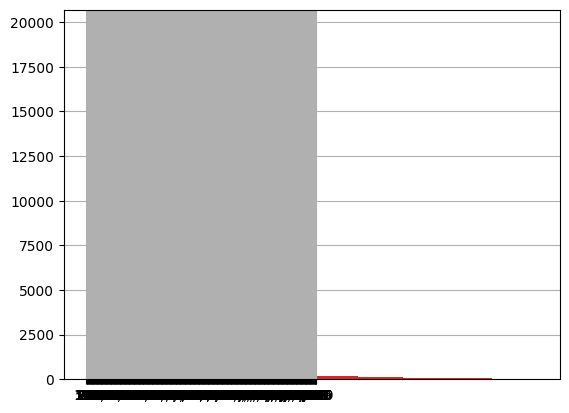

In [20]:
# Q2 - Part 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./airbnb_hw.csv',low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

# Price is an object type - should be converted to numeric.

df.head()
var = 'Price'
print(df[var].unique(),'\n')
print(df[var].hist(), '\n')

# Cleaning

var = 'Price'
print('Before coercion: \n', df[var].describe(), '\n')
df[var].hist(bins=50)

df[var].str.replace(',', '') # replacing comma separators with a blank space/nothing

df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # changed Price from an object to a numeric variable
df['Price_nan'] = df['Price'].isnull()

print('After coercion: \n', df['Price'].describe(),'\n')
df['Price'].hist(bins = 50)
print('Total Missings: \n', sum(df['Price_nan']),'\n')

print(df['Price'].describe(), '\n')
print(df[var].unique(),'\n')
print(df[var].hist(), '\n')

# In cleaning the Price variable, I converted it to a numeric variable from an object. I also created a Price_nan dummy variable to account for missing values.
# I also chose to remove the comma separator, which would affect any price values greater than 999.
# After cleaning, I ended up with 181 missing values.



(6462, 257) 

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=257) 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Type
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating        

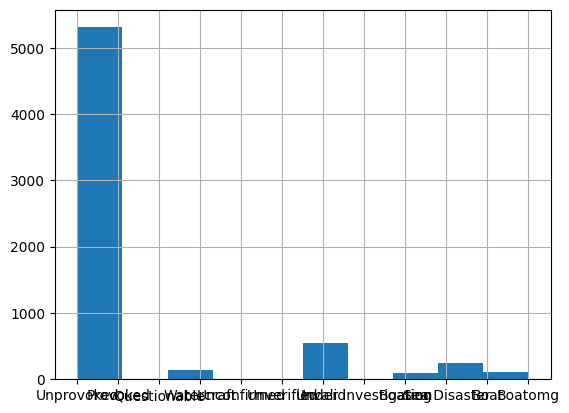

In [29]:
# Q2 - Part 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./sharks.csv',low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

df.head()

var = 'Type'
print(df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print(df[var].hist())

# Cleaning
df[var] = df[var].replace(' ',np.nan)
df[var].str.replace('Boatomg', 'Boating') # Trying to replace what I believe to be a typo of 'Boating'
print(df[var].value_counts(), '\n')

# In cleaning the Type variable of the sharks dataset, I attempted to replace missing values of the Type
# variable with the np.nan and also attempted to replace the value of 'Boatomg,' which
# I believed to be a typo, with 'Boating,' so that it could fall under the Boating value of the Type variable.


In [42]:
# Q2 - Part 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)

print(df.loc[0:5,('WhetherDefendantWasReleasedPretrial')],'\n')
# From looking at the first five values, the values are numeric, being 0s, 1s, and 9s.

# Cleaning
var = 'WhetherDefendantWasReleasedPretrial'
print(df[var].unique(), '\n')
df[var] = df[var].replace([9], np.nan)
print(df[var].value_counts())

# I had trouble getting this code chunk to run, sometimes parts of it would and sometimes it wouldn't and would crash without producing the output.
# However, in cleaning the WhetherDefendantWasReleasedPretrial variable, I attempted to replace missing values of 9, which were indicated
# as "Unclear" values from the VirginiaPretrialData2017Codebook, with np.nan.



KeyboardInterrupt: 

In [ ]:
# Q2 - Part 4

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)

print(df.loc[0:5,('ImposedSentenceAllChargeInContactEvent')],'\n')
# From looking at first five values, it seems that they are numeric, but some are floats and some are integers.

# Cleaning
var = 'ImposedSentenceAllChargeInContactEvent'
df[var] = pd.to_numeric(df[var], errors='coerce')

df['ImposedSentenceAllChargeInContactEvent_nan'] = df['ImposedSentenceAllChargeInContactEvent'].isnull()

print('After coercion: \n', df['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')
df['ImposedSentenceAllChargeInContactEvent'].hist(bins = 50)
print('Total Missings: \n', sum(df['ImposedSentenceAllChargeInContactEvent_nan']), '\n')

# I also had trouble getting this code chunk to run, as it would often crash without producing the output.
# In cleaning the ImposedSentenceAllChargeInContactEvent variable, I converted it to be entirely numeric in order
# to have all the values be in the same format, and indicated missing values as 1 through creating the dummy variable.


**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?